In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10))
    e[j] = 1.0
    return e

digits = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]).T

def showImage(data, label):
    pixels = (255 - data * 255).astype(int).reshape(28, 28)
    if hasattr(label, "__len__"):
        label = label.dot(digits)
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
f = gzip.open('../data/mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

X = np.array([np.reshape(x, (28, 28, 1)) for x in training_data[0]])
y = np.array([vectorized_result(y) for y in training_data[1]])
X_val = np.array([np.reshape(x, (28, 28, 1)) for x in validation_data[0]])
y_val = np.array([vectorized_result(y) for y in validation_data[1]])
X_test = np.array([np.reshape(x, (28, 28, 1)) for x in test_data[0]])
y_test = np.array([vectorized_result(y) for y in test_data[1]])


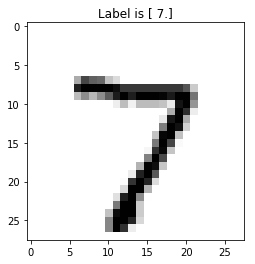

In [2]:
showImage(X_test[0], y_test[0])

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
# input: 28x28 images with gray scale
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

model.fit(X, y, batch_size=10, epochs=5, validation_data=(X_val, y_val))


Using TensorFlow backend.


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 235s - loss: 0.0445 - acc: 0.6818 - val_loss: 0.0074 - val_acc: 0.9565
Epoch 2/5
24550/50000 [=============>................] - ETA: 120s - loss: 0.0141 - acc: 0.9210

KeyboardInterrupt: 

In [9]:
score = model.evaluate(X_test, y_test, batch_size=32)
score

10000/10000 [==============================] - 12s    


[0.0027719107160928389, 0.98370000000000002]